# Oscillation maps

Goal: Correlate MEG power spectra maps of neural oscillation from Hansen paper with PC gradients

In [2]:
# Import modules and R
import numpy as np, pandas as pd
from plotnine import *
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import sys, os
sys.path.append('../code')
import pcaVersion
from processing_helpers import *
from analysis_helpers import *
# from brainspan import *
%R source("../code/Rplots.R");
%R source("../code/brainPlots.R");

Attaching package: ‘lemon’



    %||%



    CoordCartesian, element_render




In [4]:
sys.path.append('/home/rajd2/repos/hansen_receptors')

MEG spectra only exist in Cammoun parcellations...

In [15]:
scale = 'scale125'

path = '/home/rajd2/repos/hansen_receptors/'

power = np.genfromtxt(path+'data/MEG/power_'+scale+'.csv', delimiter=',')
power_band = ["delta", "theta", "alpha", "beta", "gamma1", "gamma2"]

Get Cammoun info to label power data

In [16]:
from netneurotools import datasets
cammoun = datasets.fetch_cammoun2012()
cammoun

{'scale033': '/home/rajd2/nnt-data/atl-cammoun2012/MNI152NLin2009aSym/atl-Cammoun2012_space-MNI152NLin2009aSym_res-033_deterministic.nii.gz',
 'scale060': '/home/rajd2/nnt-data/atl-cammoun2012/MNI152NLin2009aSym/atl-Cammoun2012_space-MNI152NLin2009aSym_res-060_deterministic.nii.gz',
 'scale125': '/home/rajd2/nnt-data/atl-cammoun2012/MNI152NLin2009aSym/atl-Cammoun2012_space-MNI152NLin2009aSym_res-125_deterministic.nii.gz',
 'scale250': '/home/rajd2/nnt-data/atl-cammoun2012/MNI152NLin2009aSym/atl-Cammoun2012_space-MNI152NLin2009aSym_res-250_deterministic.nii.gz',
 'scale500': '/home/rajd2/nnt-data/atl-cammoun2012/MNI152NLin2009aSym/atl-Cammoun2012_space-MNI152NLin2009aSym_res-500_deterministic.nii.gz',
 'info': '/home/rajd2/nnt-data/atl-cammoun2012/MNI152NLin2009aSym/atl-Cammoun2012_space-MNI152NLin2009aSym_info.csv'}

In [63]:
cammoun_cortex = pd.read_csv(cammoun['info']).query("structure == 'cortex' & scale == @scale")
power = pd.DataFrame(power, columns=power_band, index=cammoun_cortex['id'])
power

,delta,theta,alpha,beta,gamma1,gamma2
id,,,,,,
1,0.37977,0.25955,0.23399,0.085055,0.025232,0.016403
2,0.37571,0.27123,0.21868,0.092195,0.026305,0.015875
3,0.39287,0.26616,0.21019,0.086037,0.027361,0.017389
4,0.40214,0.26592,0.19819,0.084731,0.029588,0.019433
5,0.38336,0.26773,0.20411,0.093096,0.031352,0.020357
...,...,...,...,...,...,...
222,0.36829,0.24022,0.26097,0.086391,0.025970,0.018158
223,0.31578,0.23964,0.32822,0.090305,0.017005,0.009041
224,0.31632,0.24152,0.31064,0.095772,0.022455,0.013294


So let's get the PCs in this parcellation:

In [39]:
info = pd.read_csv(cammoun['info']).query("scale == @scale")

atlas = {'image':cammoun[scale], 'info':info}

cammoun125 = pcaVersion(get_expression_abagen(atlas=atlas, save_name='cammoun125_base'))

INFO: Group-level atlas provided; using MNI coords for tissue samples
INFO: Reannotating probes with information from Arnatkevic̆iūtė et al., 2019, NeuroImage
INFO: Filtering probes with intensity-based threshold of 0.5
INFO: 32670 probes survive intensity-based filtering
INFO: Reducing probes indexing same gene with method: diff_stability
INFO: 15947 genes remain after probe filtering + selection
INFO: 436 / 475 samples matched to regions for donor #9861
INFO: 357 / 369 samples matched to regions for donor #10021
INFO: 163 / 182 samples matched to regions for donor #12876
INFO: 231 / 262 samples matched to regions for donor #14380
INFO: 218 / 223 samples matched to regions for donor #15496
INFO: 229 / 239 samples matched to regions for donor #15697
INFO: 235 / 234 regions have >=0 total samples
INFO: 235 / 234 regions have samples from >=0 donors
INFO: Aggregating samples to regions with provided region_agg: donors


15947 genes remain after filtering for top 1 differential stability


In [122]:
cammoun125_ds7 = pcaVersion(get_expression_abagen(atlas=atlas, donors_threshold=3, DS_threshold=0.7))

4784 genes remain after filtering for top 0.3 differential stability
New PCA version


In [123]:
cammoun125_ds9 = pcaVersion(get_expression_abagen(atlas=atlas, donors_threshold=3, DS_threshold=0.9, save_name='cammoun125_ds9'))

1595 genes remain after filtering for top 0.1 differential stability
New PCA version


In [120]:
cammoun125 = pcaVersion(cammoun125)
cammoun125_ds7 = pcaVersion(cammoun125_ds7)
cammoun125_ds9 = pcaVersion(cammoun125_ds9)

New PCA version


Let's compare coefficients with the HCP gradients

In [116]:
data_dir = "../data/abagen-data/expression/"
# hcp_base = pcaVersion(pd.read_csv(data_dir + 'hcp_base.csv', index_col=0))
# hcp_3donors_ds7 = pcaVersion(pd.read_csv(data_dir + 'hcp_3donors_ds7.csv', index_col=0))
# hcp_3donors_ds8 = pcaVersion(pd.read_csv(data_dir + 'hcp_3donors_ds8.csv', index_col=0))
hcp_3donors_ds9 = pcaVersion(pd.read_csv(data_dir + 'hcp_3donors_ds9.csv', index_col=0))

New PCA version


In [72]:
hcp_3donors_ds7_mni = pcaVersion(get_expression_abagen(atlas=fetch_hcp(native=False), donors_threshold=3, DS_threshold=0.7, save_name='hcp_3donors_ds7_mni'))
# hcp_3donors_ds7_mni = pcaVersion(pd.read_csv(data_dir + 'hcp_3donors_ds7_mni.csv', index_col=0))

4784 genes remain after filtering for top 0.3 differential stability
New PCA version


In [84]:
cammoun125_ds7.corr_coefs(hcp_3donors_ds7)

,0,1,2,3,4
0,0.992155,-0.074909,0.019675,0.102068,0.021510
1,0.106585,0.947659,0.181072,-0.149027,-0.104675
2,-0.084387,-0.206030,0.909358,-0.016832,-0.230512
3,0.069328,-0.211777,-0.279827,-0.631444,-0.518136
4,0.034400,0.070963,0.009642,-0.437989,0.048584


In [85]:
correlate(hcp_base.score_from(cammoun125_ds7), hcp_base.score_from(hcp_3donors_ds7))

,0,1,2,3,4
0,0.997631,-0.119873,0.034505,0.064160,-0.044814
1,0.091451,0.957249,0.055384,-0.122593,-0.158092
2,-0.061719,-0.297455,0.947174,-0.078036,-0.094767
3,0.205807,-0.209031,-0.287799,-0.592499,-0.487810
4,0.134648,-0.025355,0.177485,-0.347843,0.247509


Great!

In [142]:
weights = pd.concat({
    'Cammoun125 DS0 vs HCP DS0': cammoun125.corr_coefs(hcp_base),
    'Cammoun125 DS9 vs HCP DS9': cammoun125_ds9.corr_coefs(hcp_3donors_ds9),
    'Cammoun125 DS7 vs HCP DS7': cammoun125_ds7.corr_coefs(hcp_3donors_ds7),
    'Cammoun125 DS7 vs HCP DS7 MNI': cammoun125_ds7.corr_coefs(hcp_3donors_ds7_mni)
})

scores = pd.concat({
    'Cammoun125 DS0 vs HCP DS0': correlate(hcp_base.score_from(cammoun125), hcp_base.score_from(hcp_base)),
    'Cammoun125 DS9 vs HCP DS9': correlate(hcp_base.score_from(cammoun125_ds9), hcp_base.score_from(hcp_3donors_ds9)),
    'Cammoun125 DS7 vs HCP DS7': correlate(hcp_base.score_from(cammoun125_ds7), hcp_base.score_from(hcp_3donors_ds7)),
    'Cammoun125 DS7 vs HCP DS7 MNI': correlate(hcp_base.score_from(cammoun125_ds7), hcp_base.score_from(hcp_3donors_ds7_mni))
})

corrs = pd.concat({'Gene weights':weights, 'Region scores':scores}).melt(ignore_index=False).reset_index().set_axis(['type','version','x','y','corr'],axis=1)

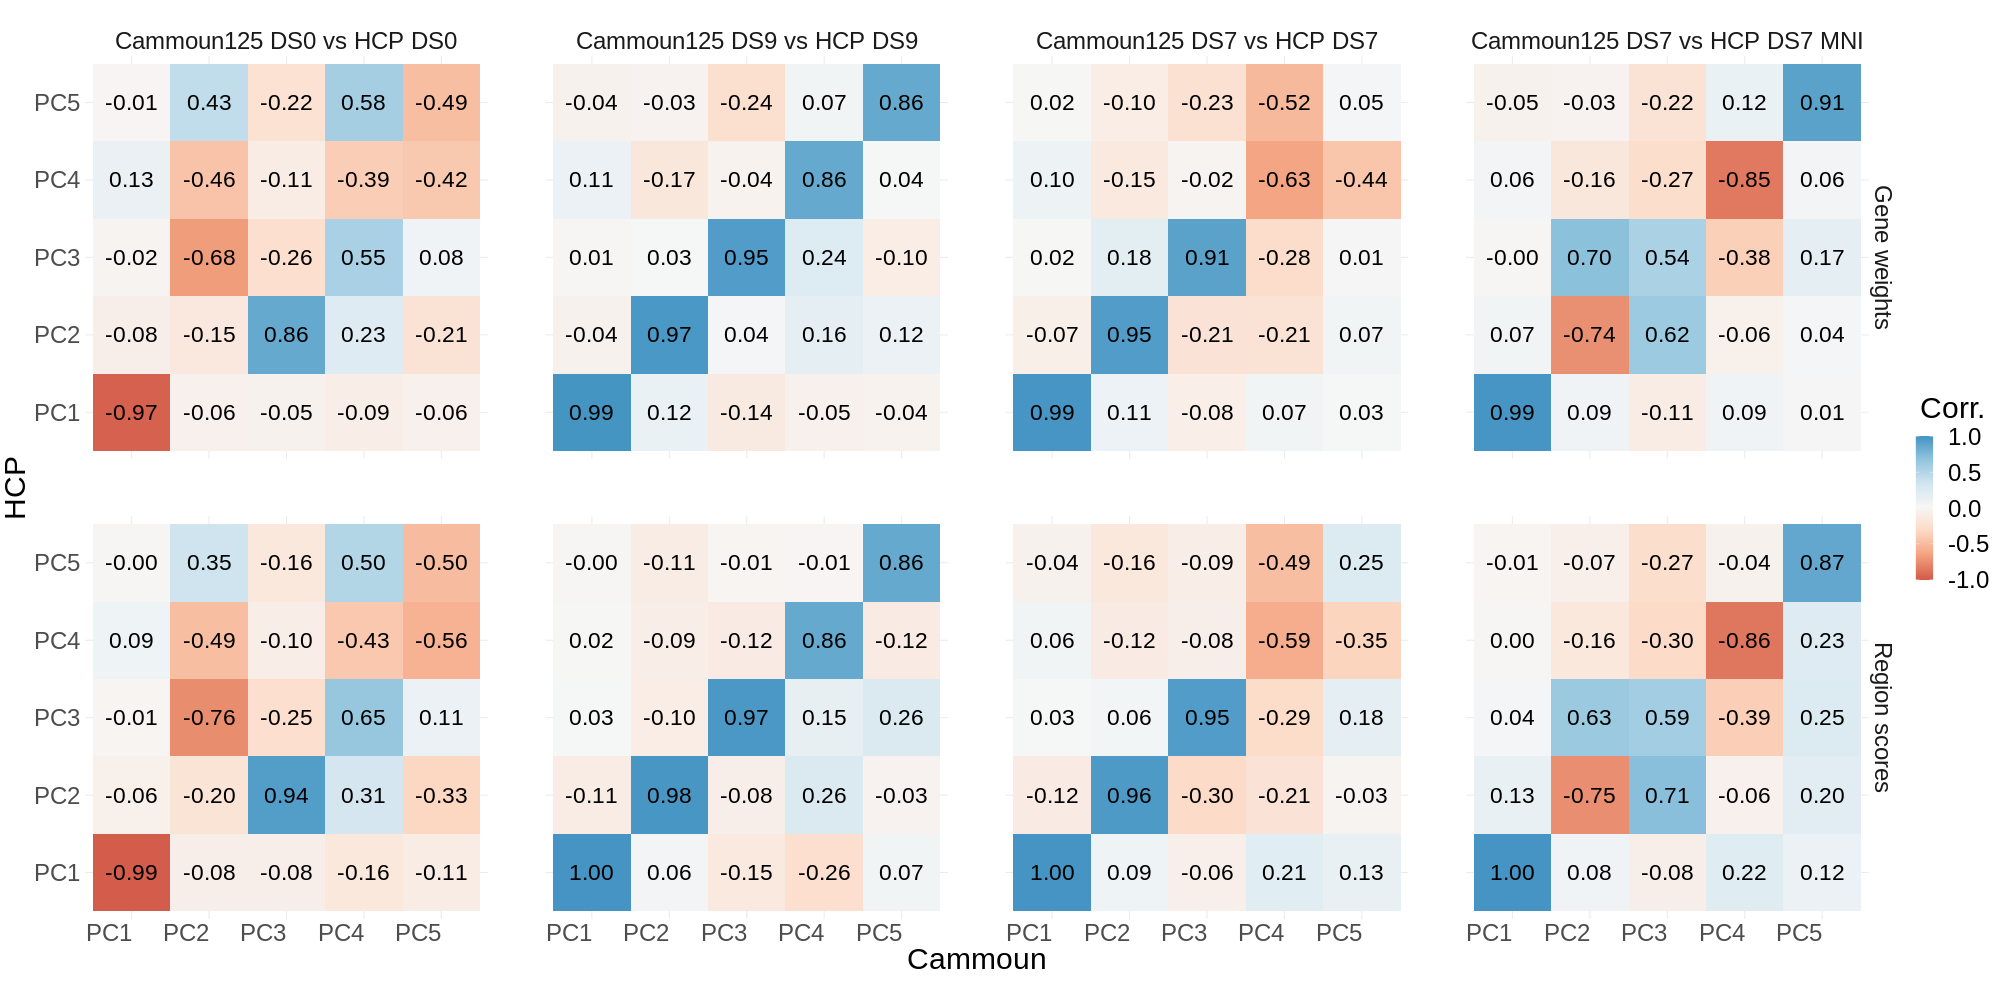

In [145]:
%%R -i corrs -w 2000 -h 1000
corrs %>% mutate(
    x=recode(x, `0`='PC1',`1`='PC2',`2`='PC3',`3`='PC4',`4`='PC5'),
    y=recode(y, `0`='PC1',`1`='PC2',`2`='PC3',`3`='PC4',`4`='PC5')
) %>% 
mutate_at(vars(version), ~ factor(., levels=unique(.))) %>% 
ggplot() + facet_grid(type~version) +
coord_fixed() +
geom_tile(aes(x,y, fill=corr)) +
geom_text(aes(x,y, label=sprintf("%0.2f", round(corr, digits = 2))), size=8) +
scale_fill_gradientn(colours=brewer.rdbu(100)[20:80], limits=c(-1,1), guide='colourbar') +
guides(fill=guide_colourbar(title='Corr.', barheight=10)) +
theme_minimal() + 
theme(panel.spacing=unit(4,'lines'), 
      axis.text.x=element_text(hjust=1),
      # strip.text.y=element_text(hjust=2),
      legend.title.align = 0.5
     ) +
theme(text=element_text(size=30)) +
xlab('Cammoun') + ylab('HCP') 

## Correlate power spectrum

In [176]:
version = cammoun125_ds9
cammoun_corrs = (version.scores
                 .iloc[:,:3].set_axis([f'PC{i+1}' for i in range(3)],axis=1)
                 .join(power)
                 .corr()
                 .iloc[3:,:3]
                )
cammoun_corrs.style.format('{:.2f}')

,PC1,PC2,PC3
delta,-0.54,0.30,-0.16
theta,-0.26,0.80,0.02
alpha,0.45,-0.64,0.10
beta,0.14,0.57,0.08
gamma1,-0.40,0.57,-0.16
gamma2,-0.51,0.18,-0.22


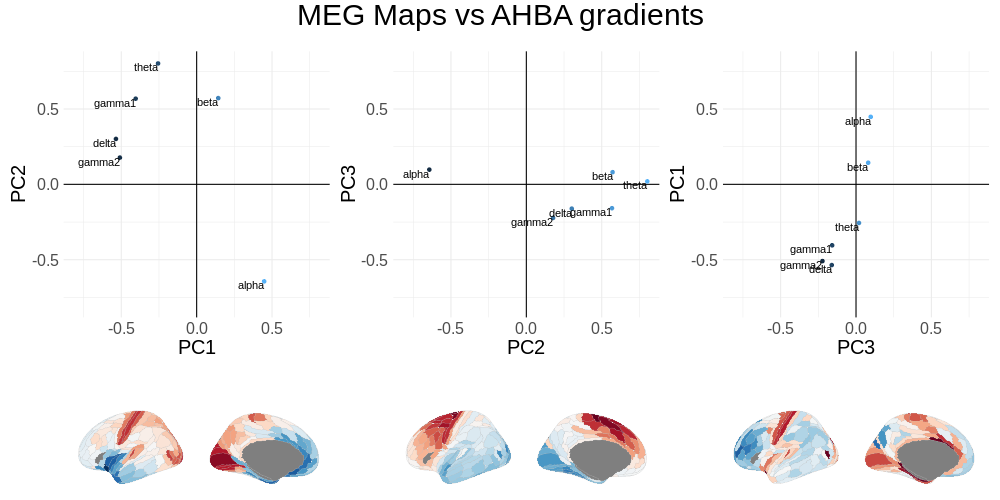

In [177]:
%%R -i cammoun_corrs -i scores -w 1000 -h 500
source("../code/receptors.R")
df <- cammoun_corrs
g1 <- ggplot(df,aes(x=PC1, y=PC2)) + geom_hline(yintercept=0) + geom_vline(xintercept=0) + 
    geom_point(aes(color=PC1)) + geom_text(aes(label=rownames(df)), hjust=1, vjust=1) 
g2 <- ggplot(df,aes(x=PC2, y=PC3)) + geom_hline(yintercept=0) + geom_vline(xintercept=0) + 
    geom_point(aes(color=PC2)) + geom_text(aes(label=rownames(df)), hjust=1, vjust=1)
g3 <- ggplot(df,aes(x=PC3, y=PC1)) + geom_hline(yintercept=0) + geom_vline(xintercept=0) + 
    geom_point(aes(color=PC3)) + geom_text(aes(label=rownames(df)), hjust=1, vjust=1)

lim <- max(df)
g123 <- (g1 | g2 | g3) & 
      guides(color=F) &
      xlim(c(-lim,lim)) & ylim(c(-lim,lim)) & 
      theme_minimal() & theme(aspect.ratio=1)
    
g0 <- plot_hcp_wide(scores) + guides(fill='none')

(
    (g123 / g0) & theme(text=element_text(size=20))
) + plot_layout(heights=c(3,1)) + 
 plot_annotation(title = 'MEG Maps vs AHBA gradients',
                theme = theme(plot.title = element_text(size = 30, hjust=.5)))